In [328]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [329]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [330]:
kc = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/kc_house_data.csv')

In [331]:
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [332]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [333]:
# Transform date to a datetime data format
kc['date'] = pd.to_datetime(kc['date'])

In [334]:
# Extract hour, month, day into new columns
kc['month'] = kc['date'].dt.month
kc['day'] = kc['date'].dt.day
kc['year'] = kc['date'].dt.year

In [335]:
kc.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,day,year
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,...,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,6.574423,15.688197,2014.322954
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,...,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,3.115308,8.635063,0.467616
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,1.000000,1.000000,2014.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,4.000000,8.000000,2014.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,...,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,6.000000,16.000000,2014.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,...,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,9.000000,23.000000,2015.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,12.000000,31.000000,2015.000000


In [336]:
kc.drop_duplicates(inplace=True)
#drop duplicates of the dataset

<AxesSubplot:ylabel='floors'>

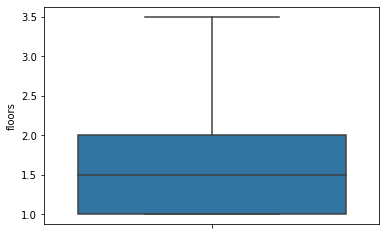

In [337]:
sns.boxplot(data = kc, y='floors')

<AxesSubplot:ylabel='grade'>

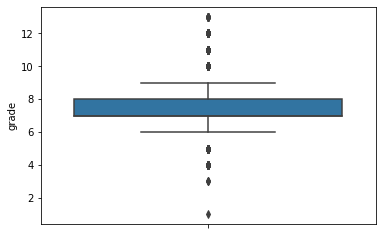

In [338]:
sns.boxplot(data = kc, y='grade')

<AxesSubplot:ylabel='yr_built'>

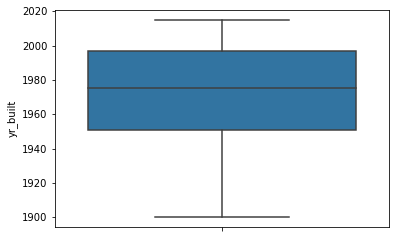

In [339]:
sns.boxplot(data = kc, y='yr_built')

<AxesSubplot:ylabel='bedrooms'>

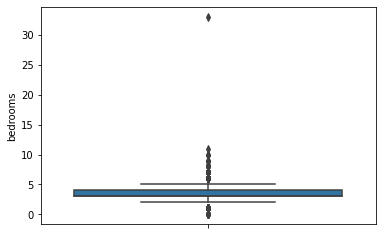

In [340]:
sns.boxplot(data = kc, y='bedrooms')

We consider remove the outlier shown in the bedroom's boxplot.

In [341]:
drop_bedrooms_outliers = kc[kc['bedrooms']>30].index
drop_bedrooms_outliers

Int64Index([15870], dtype='int64')

In [342]:
kc.drop(drop_bedrooms_outliers, inplace=True)

In [343]:
kc.drop('id', axis=1, inplace = True)
kc.drop('zipcode', axis=1, inplace = True)
#drop columns that are not related to the price

In [344]:
kc.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,day,year
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,47.5112,-122.257,1340,5650,10,13,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,47.7210,-122.319,1690,7639,12,9,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,47.7379,-122.233,2720,8062,2,25,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,47.5208,-122.393,1360,5000,12,9,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,47.6168,-122.045,1800,7503,2,18,2015


In [345]:
# Create function to classify amounts
def total_cat(x):
    if x >0:
        return 1
    else:
        return 0

In [346]:
# Create new column by applying total_cat() function created above
# we create a new column to as dummy variable 
kc['if_renovated'] = kc['yr_renovated'].apply(total_cat)

In [347]:
correlations = kc.corr()['price']
# Filter the columns with correlation above 0.5
high_corr_columns = correlations[abs(correlations) >= 0.5].index.tolist()
print(f"Columns with correlation above or equal to 0.5 with 'x': {high_corr_columns}")


Columns with correlation above or equal to 0.5 with 'x': ['price', 'bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15']


To avoid multicollinearity, I keep only one of the highly correlated variables, either 'sqft_living' or 'sqft_living15'. Both variables represent square footage measurements, and their similarity suggests a high degree of multicollinearity, which can adversely affect the model's performance and interpretation.

In [348]:
results = ols("price ~ bathrooms+sqft_living+grade+sqft_above", data=kc).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     6433.
Date:                Wed, 12 Jul 2023   Prob (F-statistic):               0.00
Time:                        00:12:50   Log-Likelihood:            -2.9912e+05
No. Observations:               21612   AIC:                         5.982e+05
Df Residuals:                   21607   BIC:                         5.983e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -6.503e+05   1.35e+04    -48.133      

We observed that all the values in the summary exhibit large numerical values, and the skewness and kurtosis values indicate that the data is not normally distributed. Given this situation, we can attempt to address the issue by applying a logarithmic transformation to our variables.

In [349]:
kc['log_sqft_living'] = np.log(kc['sqft_living'])
kc['log_grade'] = np.log(kc['grade'])
kc['log_price'] = np.log(kc['price'])
kc['log_sqft_above'] = np.log(kc['sqft_above'])

In [350]:
results_log1 = ols("log_price ~ bathrooms + log_sqft_living + log_grade+ log_sqft_above", data=kc).fit()
print(results_log1.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     6400.
Date:                Wed, 12 Jul 2023   Prob (F-statistic):               0.00
Time:                        00:12:50   Log-Likelihood:                -8364.3
No. Observations:               21612   AIC:                         1.674e+04
Df Residuals:                   21607   BIC:                         1.678e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.8133      0.061    1

After applying the logarithmic transformation to our variables, we can observe that the skewness and kurtosis values indicate a more normal distribution in the regression analysis. Additionally, the coefficient values are not as large as they were before. These changes suggest that the logarithmic transformation has helped to improve the normality and interpretability of the regression model.

In [351]:
results_log3 = ols("log_price ~ bathrooms + bedrooms+\
                  log_sqft_living + log_grade+ log_sqft_above + \
                  waterfront+view+condition+if_renovated+yr_built", data=kc).fit()
print(results_log3.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     3800.
Date:                Wed, 12 Jul 2023   Prob (F-statistic):               0.00
Time:                        00:12:51   Log-Likelihood:                -5841.4
No. Observations:               21612   AIC:                         1.170e+04
Df Residuals:                   21601   BIC:                         1.179e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          17.5038      0.206     

 We also add the categorical variables in the model. We know when the p-value is greater than 0.05, it suggests that the coefficient is not statistically significant, so we remove if_renovated and log_sqft_above. 

In [352]:
results_log = ols("log_price ~ bathrooms + bedrooms+\
                  log_sqft_living + log_grade + \
                  waterfront+view+condition+yr_built", data=kc).fit()
print(results_log.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     4750.
Date:                Wed, 12 Jul 2023   Prob (F-statistic):               0.00
Time:                        00:12:51   Log-Likelihood:                -5842.0
No. Observations:               21612   AIC:                         1.170e+04
Df Residuals:                   21603   BIC:                         1.177e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          17.4992      0.194     

Now we get our final ols regression model

In [353]:
kc.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_living15,sqft_lot15,month,day,year,if_renovated,log_sqft_living,log_grade,log_price,log_sqft_above
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1340,5650,10,13,2014,0,7.073270,1.945910,12.309982,7.073270
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,1690,7639,12,9,2014,1,7.851661,1.945910,13.195614,7.682482
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,2720,8062,2,25,2015,0,6.646391,1.791759,12.100712,6.646391
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1360,5000,12,9,2014,0,7.580700,1.945910,13.311329,6.956545
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1800,7503,2,18,2015,0,7.426549,2.079442,13.142166,7.426549


In [354]:
pred_vals = results_log.predict(kc[['bathrooms','bedrooms','log_sqft_living','log_grade',
                                    'waterfront','view','condition',
                                   'yr_built']])

In [355]:
pred_vals

0        12.681470
1        13.142912
2        12.414776
3        13.046774
4        12.986482
           ...    
21608    12.883098
21609    12.965868
21610    12.339443
21611    12.928411
21612    12.345085
Length: 21612, dtype: float64

In [356]:
res = pd.concat([pred_vals.to_frame().rename(columns={0:'y_hat'}),kc['price']], axis=1)

In [357]:
res

,y_hat,price
0,12.681470,221900.0
1,13.142912,538000.0
2,12.414776,180000.0
3,13.046774,604000.0
4,12.986482,510000.0
...,...,...
21608,12.883098,360000.0
21609,12.965868,400000.0
21610,12.339443,402101.0
21611,12.928411,400000.0


In [358]:
res['log_price'] = kc['log_price']

In [359]:
res['error'] = res['y_hat'] - res['log_price']

In [360]:
res.head(1)

,y_hat,price,log_price,error
0,12.68147,221900.0,12.309982,0.371488


In [361]:
res['sq_error'] = res['error']**2

In [362]:
np.sqrt(res['sq_error'].mean())

0.317072158700658

The above value indicates the square root of the mean squared error (MSE) in a regression analysis. The value is small, which implies that the regression model has a relatively low level of prediction error, which is a positive outcome.



In [363]:
kc.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_living15,sqft_lot15,month,day,year,if_renovated,log_sqft_living,log_grade,log_price,log_sqft_above
count,2.161200e+04,21612.000000,21612.000000,21612.000000,2.161200e+04,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,...,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000
mean,5.400835e+05,3.369471,2.114774,2079.921016,1.510739e+04,1.494332,0.007542,0.234314,3.409356,7.656904,...,1986.582871,12768.828984,6.574449,15.687766,2014.322969,0.042291,7.550342,2.024224,13.047802,7.394898
std,3.671351e+05,0.907982,0.770177,918.456818,4.142142e+04,0.539991,0.086519,0.766334,0.650668,1.175477,...,685.392610,27304.756179,3.115377,8.635030,0.467622,0.201258,0.424815,0.150356,0.526692,0.427630
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,...,399.000000,651.000000,1.000000,1.000000,2014.000000,0.000000,5.669881,0.000000,11.225243,5.669881
25%,3.218375e+05,3.000000,1.750000,1426.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,1490.000000,5100.000000,4.000000,8.000000,2014.000000,0.000000,7.262979,1.945910,12.681802,7.081709
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,1840.000000,7620.000000,6.000000,16.000000,2014.000000,0.000000,7.554859,1.945910,13.017003,7.352441
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,2360.000000,10083.250000,9.000000,23.000000,2015.000000,0.000000,7.843849,2.079442,13.377006,7.700748
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,6210.000000,871200.000000,12.000000,31.000000,2015.000000,1.000000,9.513404,2.564949,15.856731,9.149528


(array([1.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 5.700e+01, 9.790e+02,
        8.966e+03, 9.447e+03, 2.080e+03, 7.900e+01]),
 array([-3.24591401, -2.788575  , -2.33123598, -1.87389696, -1.41655795,
        -0.95921893, -0.50187992, -0.0445409 ,  0.41279812,  0.87013713,
         1.32747615]),
 <BarContainer object of 10 artists>)

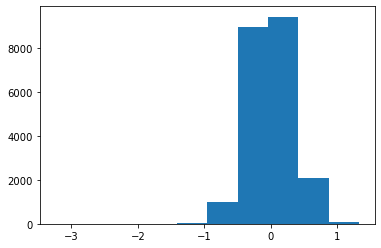

In [364]:
plt.hist(res['error'])
#the model is almost a normal distribution

(array([6.300e+01, 5.330e+02, 3.977e+03, 7.183e+03, 6.344e+03, 2.541e+03,
        7.330e+02, 1.930e+02, 3.800e+01, 7.000e+00]),
 array([11.22524339, 11.68839214, 12.15154089, 12.61468964, 13.07783839,
        13.54098714, 14.00413589, 14.46728464, 14.93043339, 15.39358214,
        15.85673089]),
 <BarContainer object of 10 artists>)

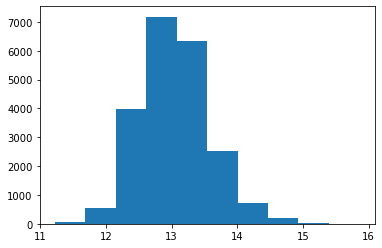

In [365]:
plt.hist(kc['log_price'])

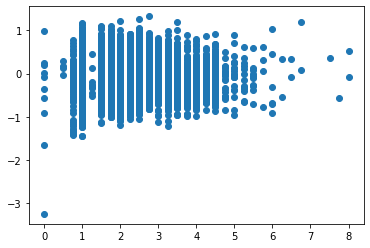

In [366]:
plt.scatter(kc['bathrooms'],res['error'])
# we can find that the points are around value 0, thus a good prediction.

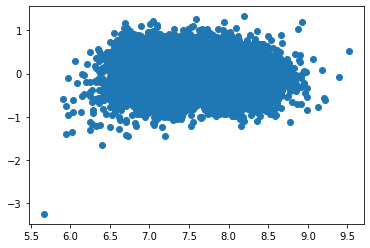

In [367]:
plt.scatter(kc['log_sqft_living'],res['error'])
# we can find that the points are around value 0, thus a good prediction.

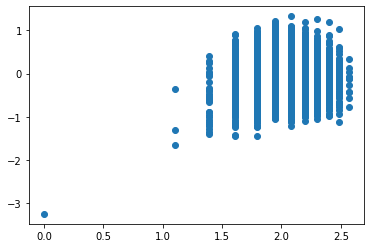

In [368]:
plt.scatter(kc['log_grade'],res['error'])
# we can find that the most of the points are around value 0, thus a good prediction.

((array([-3.99702463, -3.78180084, -3.66407141, ...,  3.66407141,
          3.78180084,  3.99702463]),
  array([-3.24591401, -1.64225598, -1.44801913, ...,  1.20969698,
          1.26396137,  1.32747615])),
 (0.3163917729660636, 1.263894439404241e-13, 0.9976765319758752))

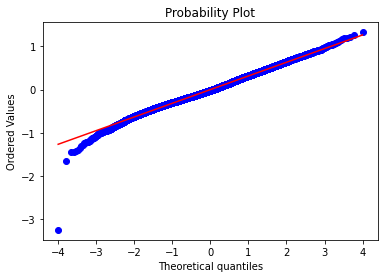

In [370]:
import scipy.stats as stats
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(res['error'], dist='norm', plot=ax)
#qq plot: the line indicates that the regression has a normal distribution.

In [371]:
infl = results_log.get_influence()
print(infl.summary_frame())

       dfb_Intercept  dfb_bathrooms  dfb_bedrooms  dfb_log_sqft_living  \
0          -0.002287       0.008550     -0.005408             0.004557   
1           0.000769       0.000278     -0.001681             0.002264   
2          -0.010245      -0.003790      0.001710             0.007767   
3           0.000831       0.011120      0.001412            -0.004277   
4          -0.000752      -0.000732     -0.000265            -0.001426   
...              ...            ...           ...                  ...   
21608       0.000897      -0.001415     -0.000048             0.002391   
21609       0.001810       0.000555     -0.000902            -0.000098   
21610      -0.025077      -0.023427     -0.002359            -0.002016   
21611       0.000203      -0.000456      0.000057             0.000660   
21612      -0.015064      -0.014251     -0.001474            -0.001264   

       dfb_log_grade  dfb_waterfront  dfb_view  dfb_condition  dfb_yr_built  \
0          -0.005877       -0.00

In [372]:
infl.summary_frame()

,dfb_Intercept,dfb_bathrooms,dfb_bedrooms,dfb_log_sqft_living,dfb_log_grade,dfb_waterfront,dfb_view,dfb_condition,dfb_yr_built,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.002287,0.008550,-0.005408,0.004557,-0.005877,-0.000438,0.000196,0.006247,0.001301,3.261954e-05,-1.171502,0.000214,-0.017134,-1.171512,-0.017134
1,0.000769,0.000278,-0.001681,0.002264,-0.001725,-0.000023,-0.000637,-0.001170,-0.001126,1.116192e-06,0.166209,0.000364,0.003169,0.166205,0.003169
2,-0.010245,-0.003790,0.001710,0.007767,-0.000611,0.000134,-0.000415,0.006801,0.007093,3.690787e-05,-0.990473,0.000338,-0.018226,-0.990473,-0.018226
3,0.000831,0.011120,0.001412,-0.004277,-0.004617,0.000217,-0.002001,0.014001,0.000563,4.395482e-05,0.834432,0.000568,0.019890,0.834426,0.019889
4,-0.000752,-0.000732,-0.000265,-0.001426,0.002314,0.000128,-0.000745,-0.001269,0.000963,2.855145e-06,0.490930,0.000107,0.005069,0.490921,0.005069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,0.000897,-0.001415,-0.000048,0.002391,-0.001072,-0.000054,0.000143,0.000124,-0.001600,1.925018e-06,-0.281419,0.000219,-0.004162,-0.281413,-0.004162
21609,0.001810,0.000555,-0.000902,-0.000098,0.000367,-0.000099,0.000144,0.000198,-0.001928,8.752438e-07,-0.210172,0.000178,-0.002807,-0.210168,-0.002807
21610,-0.025077,-0.023427,-0.002359,-0.002016,0.004452,0.000084,0.004525,0.000666,0.027074,1.802096e-04,1.782061,0.000510,0.040273,1.782150,0.040275
21611,0.000203,-0.000456,0.000057,0.000660,-0.000312,-0.000016,0.000084,0.000090,-0.000396,1.703382e-07,-0.092055,0.000181,-0.001238,-0.092053,-0.001238


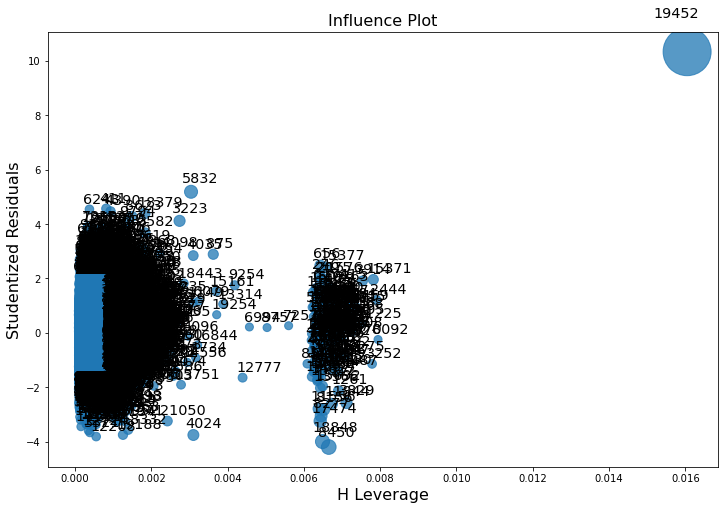

In [373]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results_log, ax=ax, criterion='cooks')
# We can find that there is one influence spot located at the top right cornor, which indicates
# that we need to remove this outlier with index = 19452.

In [374]:
filtered_kc = kc.drop(19452, axis=0)

In [375]:
results_log_2 = ols("log_price ~ bathrooms + log_sqft_living + log_grade+ log_sqft_above", data=filtered_kc).fit()

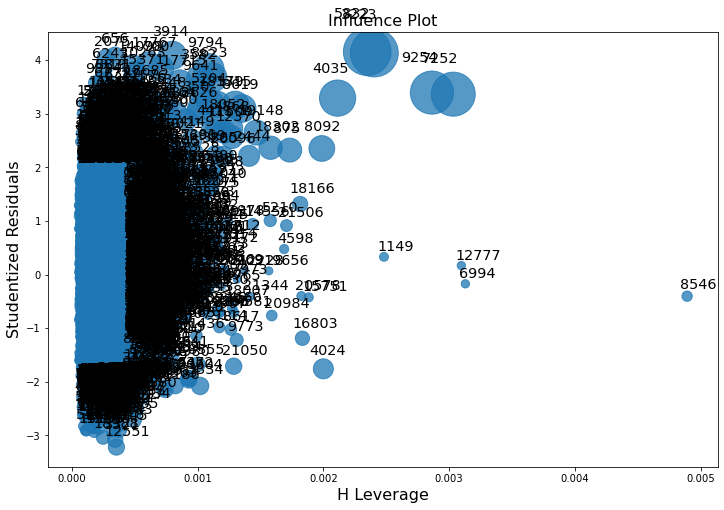

In [376]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results_log_2, ax=ax, criterion='cooks')

In [377]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [378]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso

In [379]:
filtered_kc.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_living15,sqft_lot15,month,day,year,if_renovated,log_sqft_living,log_grade,log_price,log_sqft_above
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1340,5650,10,13,2014,0,7.073270,1.945910,12.309982,7.073270
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,1690,7639,12,9,2014,1,7.851661,1.945910,13.195614,7.682482
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,2720,8062,2,25,2015,0,6.646391,1.791759,12.100712,6.646391
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1360,5000,12,9,2014,0,7.580700,1.945910,13.311329,6.956545
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1800,7503,2,18,2015,0,7.426549,2.079442,13.142166,7.426549


In [380]:
# separate features and target
categorical_features = ['waterfront','view', 'condition']
numerical_features = ['log_sqft_living','log_grade', 'bedrooms','bathrooms','yr_built']
target = 'log_price'

In [381]:
# split data in train / test
X_train, X_test, y_train, y_test = train_test_split(filtered_kc[categorical_features + numerical_features]
                                                    ,filtered_kc[target],
                                                    test_size = 0.3, random_state=1234)

In [382]:
# define transformers
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])

In [383]:
# building processor
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, categorical_features),
                                                 ('num', num_transformer, numerical_features)])

In [384]:
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [385]:
linear_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['waterfront', 'view',
                                                   'condition']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['log_sqft_living',
                                                   'log_grade', 'bedrooms',
                                                   'bathrooms',
                                                   'yr_built'])])),
                ('regressor', LinearRegression())])

In [386]:
pred2 = linear_regression.predict(X_test)

In [387]:
pred2

array([13.29037476, 13.16362   , 13.04930115, ..., 13.07194519,
       13.36645508, 12.8445282 ])

In [388]:
from sklearn.metrics import mean_squared_error

In [389]:
np.sqrt(mean_squared_error(pred2,y_test))

0.3132930543837229

In [390]:
ridge_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=3.0))
])

In [391]:
ridge_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['waterfront', 'view',
                                                   'condition']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['log_sqft_living',
                                                   'log_grade', 'bedrooms',
                                                   'bathrooms',
                                                   'yr_built'])])),
                ('regressor', Ridge(alpha=3.0))])

In [392]:
pred_ridge = ridge_regression.predict(X_test)

In [393]:
np.sqrt(mean_squared_error(pred_ridge,y_test))

0.3132925185181096

In [394]:
lasso_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1.0))
])

In [395]:
lasso_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['waterfront', 'view',
                                                   'condition']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['log_sqft_living',
                                                   'log_grade', 'bedrooms',
                                                   'bathrooms',
                                                   'yr_built'])])),
                ('regressor', Lasso())])

In [396]:
lasso_pred = lasso_regression.predict(X_test)

In [397]:
np.sqrt(mean_squared_error(lasso_pred, y_test))

0.5285962913395351

In [398]:
elasticnet_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=1.0, l1_ratio=0.8))
])

In [399]:
elasticnet_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['waterfront', 'view',
                                                   'condition']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['log_sqft_living',
                                                   'log_grade', 'bedrooms',
                                                   'bathrooms',
                                                   'yr_built'])])),
                ('regressor', ElasticNet(l1_ratio=0.8))])

In [400]:
elasticnet_pred = elasticnet_regression.predict(X_test)

In [401]:
np.sqrt(mean_squared_error(elasticnet_pred, y_test))

0.5285962913395351

We performed Ordinary Least Squares (OLS) regression, linear regression, LASSO, Ridge, and Elastic Net on the provided data. After evaluating the Mean Squared Error (MSE) values, we observed that linear regression, ridge regression, and ols regression achieved the lowest MSE values, approximately 0.31. Meanwhile, Elastic Net and LASSO demonstrated the highest MSE values, around 0.52.

We can choose either one of them(linear regression, ridge regression, and ols regression) to be the best model. They have the smallest mse, which indicates that the these three models provide the best overall fit to the data compared to the other models.




To choose the best model, we need to consider multiple reasons. We first consider alternative modeling approaches, in terms of minimizing prediction errors, we can conclude linear regression and ridge have the best performance while ols has a slightly higher mse. 

I believe ridge regression is the best, as ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. For our dataset, it's clear to see that we have similar variables, which would suffer from multicollinearity. 

To a business executive, Among these approaches, we believe that ridge regression is the most suitable choice for our dataset. Ridge regression is a model tuning method specifically designed to handle multicollinearity, which occurs when we have similar variables that are highly correlated. In our dataset, we have observed such multicollinearity, making ridge regression an ideal choice to address this issue effectively.

The main drivers of house price are bathrooms, sqft_living, grade, sqft_living15. They have an abosolute correlation value >= 0.5, which indicates there is a strong positive relationship between these variables and the house price. However, sqft_living15 has a strong multicolinearity, so we remove this variable from our prediction list. Also, including categorical variables. 

After applying logarithmic transformation to the variables in the OLS regression to address the issue, the distribution of the data becomes closer to normal, and the coefficients become extremely small. A more accurate and reliable interpretation of the relationships between the predictors and the target variable is provided.

Bathrooms: For each additional bathroom, the expected price increases by approximately 11.30%.

Bedrooms: For each additional bedroom, the expected price decreases by approximately 4.66%.

Log_sqft_living: A 1% increase in the square footage of living area is associated with an expected increase in price by approximately 38.24%.

Log_grade: A 1% increase in the grade is associated with an expected increase in price by approximately 177.83%.

Waterfront: If a property is classified as waterfront (waterfront = 1), the expected price increases by approximately 36.04% compared to properties without waterfront views.

View: Each additional view of the property is associated with an expected increase in price by approximately 5.80%.

Condition: For each additional unit increase in condition, the expected price increases by approximately 2.41%.

Yr_built: For each additional year of building age, the expected price decreases by approximately 0.56%.


